In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Training Data

In [2]:
train= pd.read_csv('aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
display(train[['city','city_development_index','relevent_experience','gender','education_level','major_discipline','experience','company_size','company_type','target']].groupby(['gender','education_level','experience','company_size']).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))

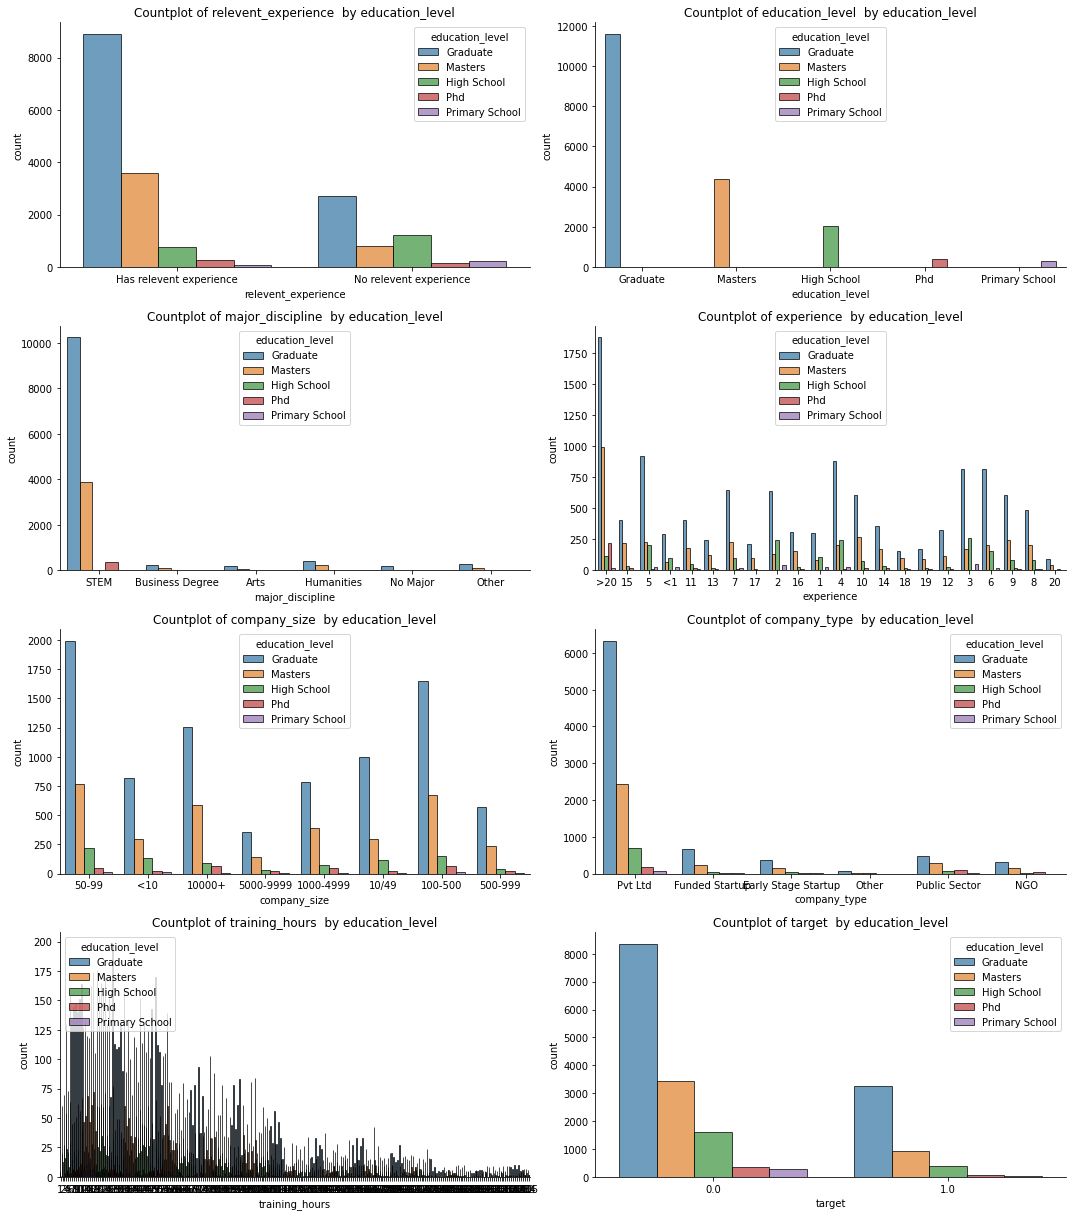

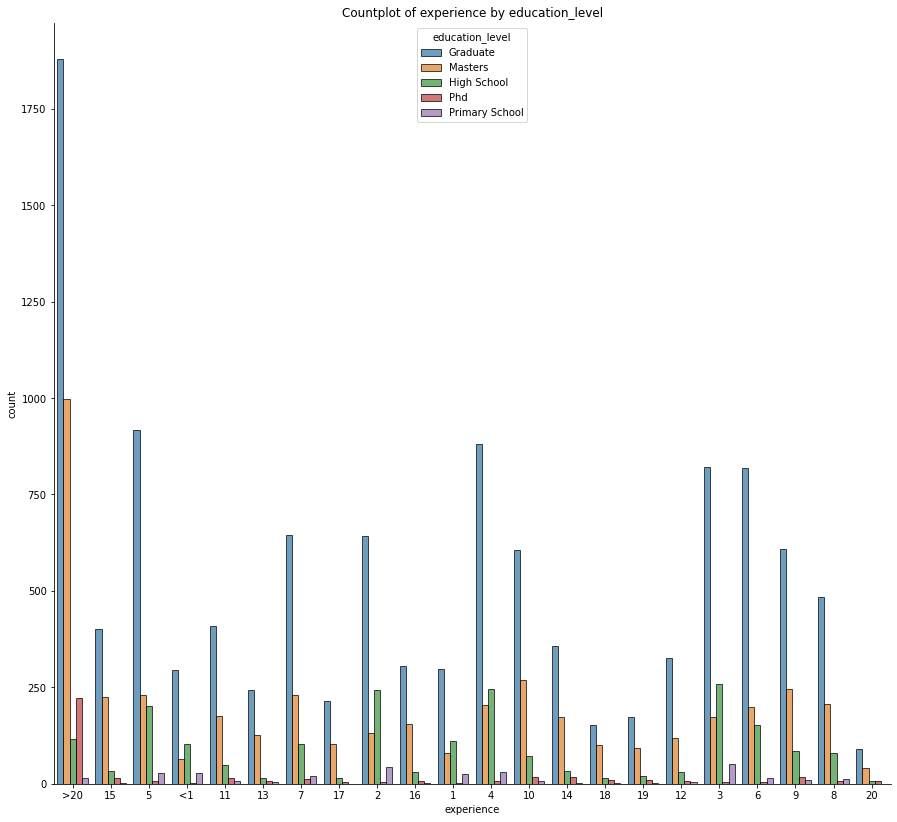

In [5]:
# Bar Plots
## barplots showing the frequency of each category separated by label

plt.figure(figsize=[15,17])
fft=['relevent_experience','education_level','major_discipline','experience',
     'company_size','company_type','training_hours','target']
n=1

for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor='black', alpha=0.7, data=train)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,14])
sns.countplot(x='experience',hue='education_level',edgecolor='black',alpha=0.7, data=train)
sns.despine()
plt.title('Countplot of experience by education_level')
plt.show()

# TARGET

In [ ]:
mnj = train['target'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(mnj.index, mnj.values, alpha=.0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target',fontsize=9)
plt.xticks(rotation=90)
plt.show
